## Computational Neuroscience Assignment 4

### Authors:
* Jochem Beurskens s4637801
* Kirina van der Bijl S1061566
* Arne Diehl S4451392

In [ ]:
import numpy as np
import scipy as sp
import networkx as nx
from scipy import optimize, integrate
import sympy as simp
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits import mplot3d
import sys

http://www.math.pitt.edu/~bard/bardware/classes/mathneuro/strogatz_crawford.pdf

## Exercise 1
### 1.a Given the phase change function of a coupled oscillator i:
$$\dot{\theta}_i=\omega_i+\dfrac{K}{N}\sum^N_{j=1}\sin (\theta_j-\theta_i)$$
### And given the complex order parameter, for which we will use the average phase vector of all neurons (the vector length, r * mean complex phase):
$$r\exp(i\Theta)=\dfrac{1}{N}\sum^{N}_{j=1}\exp(i\theta_j)$$
### derive the mean field equation
$$\dot{\theta}_i=\omega_i-Kr\sin(\Theta-\theta_i)$$ 


Solution:
$$r\exp(i\Theta)=\dfrac{1}{N}\sum^{N}_{j=1}\exp(i\theta_j)$$
multiply both sides by $\exp(-i\theta_i)$
$$r\exp(i\Theta)\exp(-i\theta_i)=\exp(-i\theta_i)\dfrac{1}{N}\sum^{N}_{j=1}\exp(i\theta_j)$$
exponent product rule gives us
$$r\exp(i(\Theta-\theta_i))=\dfrac{1}{N}\sum^{N}_{j=1}\exp(i(\theta_j-\theta_i))$$
Using Eulers formula we have that 
$$r*(\cos(\Theta-\theta_i)+i\sin(\Theta-\theta_i))=\dfrac{1}{N}\sum^{N}_{j=1}(\cos(\theta_j-\theta_i)+i\sin(\theta_j-\theta_i))$$
Equating the imaginary part delivers the following:
$$r*\sin(\Theta-\theta_i)=\dfrac{1}{N}\sum^{N}_{j=1}\sin(\theta_j-\theta_i)$$
Now we can substitute this in the original formula for the phase change and we get:
$$\dot{\theta}_i=\omega_i+Kr\sin(\Theta-\theta_i)$$
Note that this solution is equivalent with
$$\dot{\theta}_i=\omega_i-Kr\sin(\theta_i-\Theta)$$

### 1.b How should one interpret r and $\Theta$ in the mean field equation
$$\dot{\theta}_i=\omega_i+Kr\sin(\Theta - \theta_i)$$

Explanation of the parts of the function:


*   r: Amplitude of the mean field, which describes the degree of coherence of the oscillators phases
*   $\Theta$: Phase of the mean field or average phase of the oscillators
*   K: Coupling strength
*   $\omega_i$: Natural radial frequency of an oscillator i



### 1.c When can you find stable solutions of the mean field equation assuming that r and $\Theta$ are fixed?


*   r: r can only be between 1 and 0
*   $\Theta$: 0 to 2 $\pi$ radians



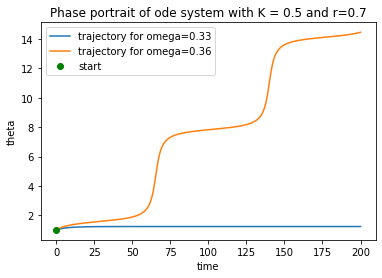

In [ ]:
#Settings
Y0 = np.array([1])
x0 = 0
interval_len = 200
stepsize = 0.025

omega = 0.33
K = 0.5
r = 0.7
big_theta = 0
ode = lambda x,Y: np.array([omega + K*r*np.sin(big_theta-Y[0])])
result1 = integrate.solve_ivp(fun=ode, t_span = (x0,interval_len), y0=Y0,method='RK45', max_step=stepsize)
plt.plot(result1.t, result1.y[0,:], label="trajectory for omega={}".format(omega))


omega = 0.36
K = 0.5
r = 0.7
big_theta = 0
ode = lambda x,Y: np.array([omega + K*r*np.sin(big_theta-Y[0])])
result2 = integrate.solve_ivp(fun=ode, t_span = (x0,interval_len), y0=Y0,method='RK45', max_step=stepsize)
plt.plot(result2.t, result2.y[0,:], label="trajectory for omega={}".format(omega))

plt.plot(result1.t[0], Y0[0], 'o', color='green', label = 'start')
plt.ylabel('theta')
plt.xlabel('time')
plt.title('Phase portrait of ode system with K = {} and r={}'.format(K,r))
plt.legend(loc='upper left')
plt.show()

In [ ]:
result1.y[0,-1]

1.2311037506145777

In the graphs above we can see that $\theta$ of oscillator i diverges to infinity when $\omega$ is bigger than $K*r$. When $\omega$ is smaller than $K*r$, it converges on a fixed point. This is expected as $\dot{\theta}_i=\omega_i-Kr\sin(\theta_i- \Theta)$ only becomes zero for $\omega_i=Kr\sin(\theta_i- \Theta)$, this can be rewritten to find a formulation of $\theta_i$ for the fixed point: $\theta_i=sin^{-1}(\dfrac{\omega_i}{Kr})+\Theta$.

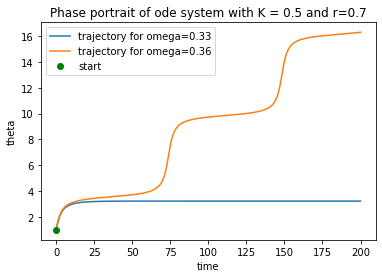

In [ ]:
#Settings
Y0 = np.array([1])
x0 = 0
interval_len = 200
stepsize = 0.025

omega = 0.33
K = 0.5
r = 0.7
big_theta = 2
ode = lambda x,Y: np.array([omega + K*r*np.sin(big_theta-Y[0])])
result1 = integrate.solve_ivp(fun=ode, t_span = (x0,interval_len), y0=Y0,method='RK45', max_step=stepsize)
plt.plot(result1.t, result1.y[0,:], label="trajectory for omega={}".format(omega))


omega = 0.36
K = 0.5
r = 0.7
big_theta = 2
ode = lambda x,Y: np.array([omega + K*r*np.sin(big_theta-Y[0])])
result2 = integrate.solve_ivp(fun=ode, t_span = (x0,interval_len), y0=Y0,method='RK45', max_step=stepsize)
plt.plot(result2.t, result2.y[0,:], label="trajectory for omega={}".format(omega))

plt.plot(result1.t[0], Y0[0], 'o', color='green', label = 'start')
plt.ylabel('theta')
plt.xlabel('time')
plt.title('Phase portrait of ode system with K = {} and r={}'.format(K,r))
plt.legend(loc='upper left')
plt.show()

In [ ]:
result1.y[0,-1]

3.231103750582817

We can clearly see the effect of $\Theta$ on the fixed point, as the fixed point increases linearly with $\Theta$.

### 1.d Determine using simulation the solution as a function of K. Use a network of N=1000 neurons, with a oscillation frequency ω drawn from normal distribution with zero mean and a standard deviation of 0.1.?
$$\dot{\theta}_i=\omega_i+\dfrac{K}{N}\sum^N_{j=1}\sin (\theta_j-\theta_i)$$


#### 1.d.1 Plot r and $\Theta$ as function of time for different values of K.

For the following solutions, we took inspiration from this [github repository](https://github.com/konsbn/kuramoto-oscillator-notebook), to increase calculation speed.

In [ ]:
def kuramoto(phases,t,omega,k,N):
    phase_deltas = phases.reshape([1,-1])
    phase_deltas = phase_deltas - phase_deltas.T
    phase_deltas = np.sin(phase_deltas)
    influence = np.sum(phase_deltas, axis = 1).T
    return omega + k/N*influence

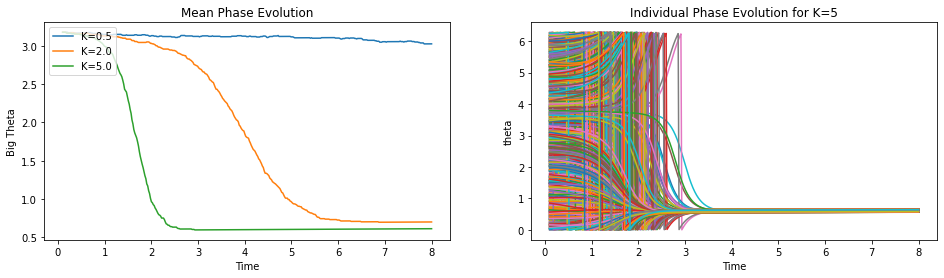

In [ ]:
N = 1000
t = np.linspace(0.1, 8.0, 400)
phases = 2*np.pi*np.random.rand(N)
omega = np.random.normal(0, .1, N)

k1 = 0.5
states1 = integrate.odeint(kuramoto, phases, t, (omega, k1, N))

k2 = 2.0
states2 = integrate.odeint(kuramoto, phases, t, (omega, k2, N))

k3 = 5.0
states3 = integrate.odeint(kuramoto, phases, t, (omega, k3, N))

plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.ylabel('Big Theta')
plt.xlabel('Time')
plt.plot(t, np.mean(np.mod(states1,2*np.pi),axis=1), label = 'K={}'.format(k1))
plt.plot(t, np.mean(np.mod(states2,2*np.pi),axis=1), label = 'K={}'.format(k2))
plt.plot(t, np.mean(np.mod(states3,2*np.pi),axis=1), label = 'K={}'.format(k3))
plt.legend(loc='upper left')
plt.title("Mean Phase Evolution")
plt.subplot(1,2,2)
plt.ylabel('theta')
plt.xlabel('Time')
plt.plot(t, np.mod(states3,2*np.pi))
plt.title("Individual Phase Evolution for K=5")
plt.show()

As we can see in the graphs above, the time to phase convergence is proportional to k. For K=5 we see this synchronization after around 3 steps, while K smaller than 5 take longer. This is expected as K is the coupling strength, thus stronger coupling makes for a faster synchronisation. In the diagram on the right handside we visualize the individual phases, which shows the convergence process.

$$r=\dfrac{\dfrac{1}{N}\sum^{N}_{j=1}\exp(i*\theta_j)}{\exp(i*\Theta)}$$


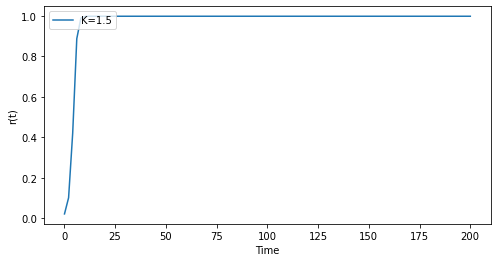

In [ ]:
N = 1000
t = np.linspace(0.1, 200.0, 100)
k = 1.5
phases = 2*np.pi*np.random.rand(N)
omega = np.random.normal(0, .1, N)

states = integrate.odeint(kuramoto, phases, t, (omega, k, N))

i = 1J
r = np.exp(i*states)
r = np.sum(r, axis=1)/N
r = r / np.exp(i*np.mean(np.mod(states,2*np.pi)))
r = np.abs(r)

plt.figure(figsize=(8,4))
plt.ylabel('r(t)')
plt.xlabel('Time')
plt.plot(t, r, label = 'K={}'.format(k))
plt.legend(loc='upper left')
plt.show()

#### 1.d.2 Plot the stationary value of r, using step 1 to determine how long to simulate, as a function of K.

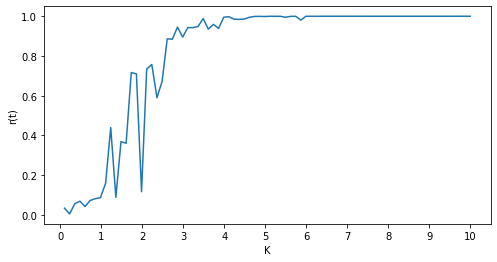

In [ ]:
def stationary_r(k=1):
  N = 1000
  t = np.linspace(15, 20.0, 5)
  phases = 2*np.pi*np.random.rand(N)
  omega = np.random.normal(0, .1, N)
  states = integrate.odeint(kuramoto, phases, t, (omega, k, N))

  r = np.exp(1J*states)
  r = np.sum(r, axis=1)/N
  r = r / np.exp(1J*np.mean(np.mod(states,2*np.pi)))
  r = np.abs(r)
  return np.mean(r[-3:])

kspace = np.linspace(0.1, 10.0, 80)
r = [stationary_r(k) for k in kspace]

plt.figure(figsize=(8,4))
plt.ylabel('r(k)')
plt.xlabel('K')
plt.plot(kspace, r)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()

In the graph above we can see that for large K, the stationary r value converges to 1. For values of K smaller than 2 it seems that there is no stationary value of r, as is evidenced by the large fluctuations in this range.

#### 1.d.3 Plot the fraction of locked oscillators as a function of K. Explain your findings.

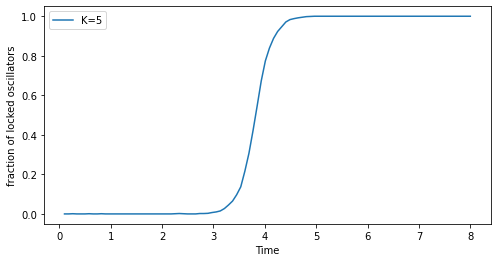

In [ ]:
N = 1000
t = np.linspace(0.1, 8.0, 100)
k = 5
phases = 2*np.pi*np.random.rand(N)
omega = np.random.normal(0, .1, N)

states = integrate.odeint(kuramoto, phases, t, (omega, k, N))
states_pad = np.concatenate((np.zeros((1,N)), states))
states_diff = states - states_pad[:len(states)]
states_diff_pad = np.concatenate((np.zeros((1,N)), states_diff))
states_diff2 = states_diff - states_diff_pad[:len(states)]
locked_frac = [(len(sdiffi[np.abs(sdiffi)<1e-6])+sys.float_info.epsilon)/N for sdiffi in states_diff2]

plt.figure(figsize=(8,4))
plt.ylabel('fraction of locked oscillators')
plt.xlabel('Time')
plt.plot(t, locked_frac, label = 'K={}'.format(k))
plt.legend(loc='upper left')
plt.show()

In the above example we plot the evolution of fraction of locked oscillators over time for K=5. We can see that after around 4 seconds, most of the phases are locked.

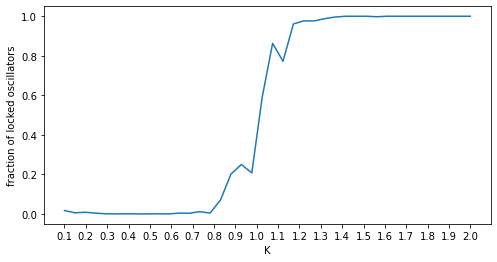

In [ ]:
def stationary_frac(k=1):
  N = 1000
  t = np.linspace(0, 20, 60)
  phases = 2*np.pi*np.random.rand(N)
  omega = np.random.normal(0, .1, N)
  states = integrate.odeint(kuramoto, phases, t, (omega, k, N))

  states_pad = np.concatenate((np.zeros((1,N)), states))
  states_diff = states - states_pad[:len(states)]
  states_diff_pad = np.concatenate((np.zeros((1,N)), states_diff))
  states_diff2 = states_diff - states_diff_pad[:len(states)]
  locked_frac = [(len(sdiffi[np.abs(sdiffi)<1e-6])+sys.float_info.epsilon)/N for sdiffi in states_diff2]
  return np.mean(locked_frac[-8:])

kspace = np.linspace(0.1, 2.0, 40)
frac = [stationary_frac(k) for k in kspace]

plt.figure(figsize=(8,4))
plt.ylabel('fraction of locked oscillators')
plt.xlabel('K')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.plot(kspace, frac)
plt.show()

In the above example we plot the stationary value of fraction of locked oscillators over time for different K. We can see that for K>0.8 the fractions converge to 1.

We expect these results, as these solutions correspond to stable solutions for the mean field equations. We had that $\dot{\theta}_i=\omega_i-Kr\sin(\theta_i- \Theta)$ only becomes zero for $\omega_i=Kr\sin(\theta_i- \Theta)$. From which we found the stable solutions: $\theta_i=sin^{-1}(\dfrac{\omega_i}{Kr})+\Theta$. In this case we have $\omega_{i_{avg}} = 0$, from which we get $\theta_i = \Theta$ and this agrees with the numerical work done above. 

